In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


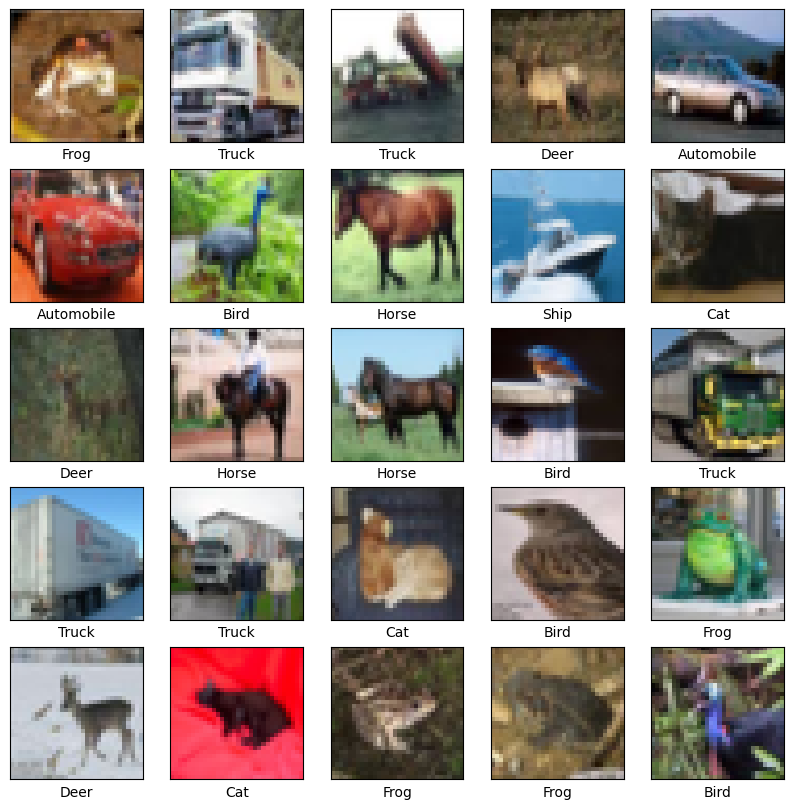

In [3]:
# Visualizing some examples
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i].argmax())])
plt.show()


In [4]:
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3255 - loss: 1.8095 - val_accuracy: 0.4819 - val_loss: 1.4272
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5318 - loss: 1.3137 - val_accuracy: 0.5747 - val_loss: 1.1740
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6030 - loss: 1.1187 - val_accuracy: 0.6207 - val_loss: 1.0585
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6441 - loss: 1.0142 - val_accuracy: 0.6439 - val_loss: 1.0006
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6755 - loss: 0.9222 - val_accuracy: 0.6426 - val_loss: 1.0175
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6987 - loss: 0.8637 - val_accuracy: 0.6615 - val_loss: 0.9617
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7148 - loss: 0.8138 - val_accuracy: 0.6838 - val_loss: 0.9223
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7331 - loss: 0.7671 - val_accuracy: 0

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - 4ms/step - accuracy: 0.7111 - loss: 0.8656
Test accuracy: 71.11%


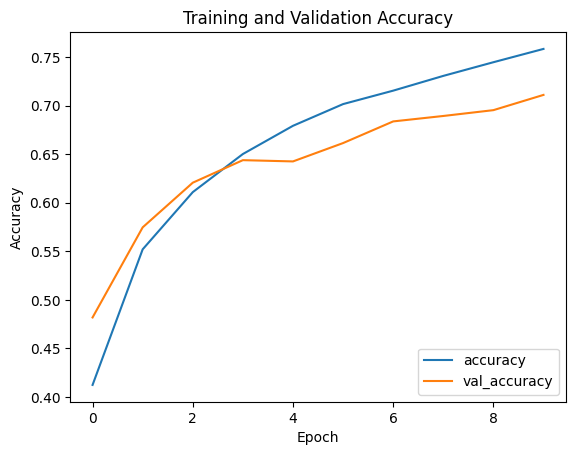

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


In [9]:
### improvement
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [10]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)


In [11]:
model = models.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Convolutional Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [14]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_test, y_test),
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.2217 - loss: 2.2084 - val_accuracy: 0.4250 - val_loss: 1.5370 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.4071 - loss: 1.6041 - val_accuracy: 0.4768 - val_loss: 1.5483 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.4926 - loss: 1.4066 - val_accuracy: 0.6053 - val_loss: 1.1645 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.5627 - loss: 1.2326 - val_accuracy: 0.6446 - val_loss: 1.0321 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6169 - loss: 1.1122 - val_accuracy: 0.5993 - val_loss: 1.2510 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.6456 - loss: 1.0274 - val_accuracy: 0.7286 - val_loss: 0.7901 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.6719 - loss: 0.9588

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - 2ms/step - accuracy: 0.8738 - loss: 0.3801
Test accuracy: 87.38%


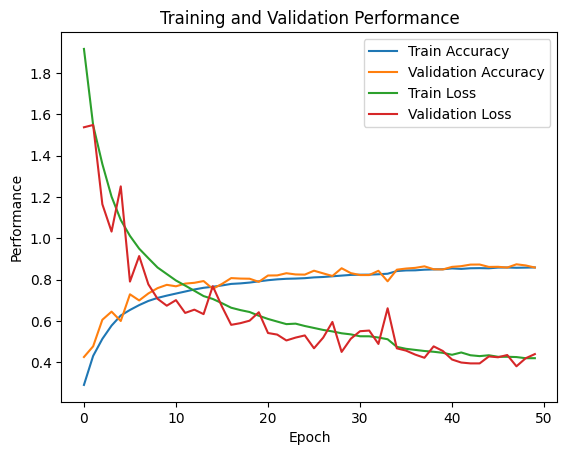

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.title('Training and Validation Performance')
plt.show()


In [17]:
import numpy as np

# Predict on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)  # Get class indices of predictions
actual_labels = np.argmax(y_test, axis=1)          # Get class indices of actual labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


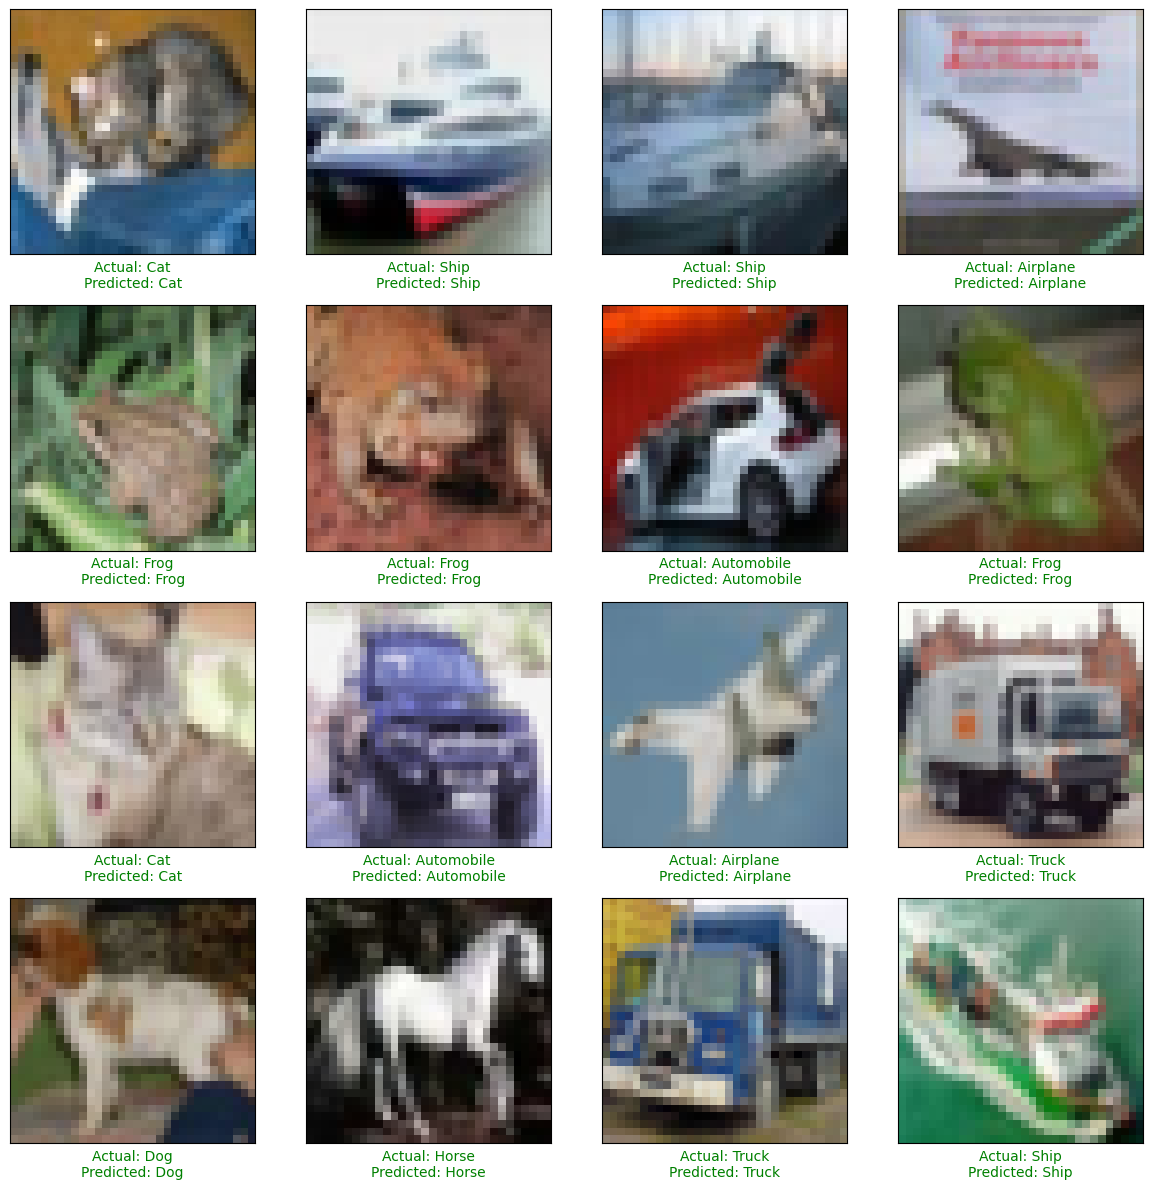

In [18]:
# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot a few test images with actual and predicted labels
plt.figure(figsize=(12, 12))
for i in range(16):  # Show 16 images
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Display the image
    actual = class_names[actual_labels[i]]
    predicted = class_names[predicted_labels[i]]
    color = 'green' if actual == predicted else 'red'  # Highlight misclassifications in red
    plt.xlabel(f"Actual: {actual}\nPredicted: {predicted}", color=color)
plt.tight_layout()
plt.show()
